In [1]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2]

In [2]:
expression_data

[[100, 200, 50, 400], [50, 0, 0, 100], [350, 100, 50, 200]]

In [3]:
import numpy as np

In [4]:
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [5]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int32
strides: (16, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [6]:
print(a.data)

In [10]:
a.ravel().shape #ravel() function is used to return a contiguous array. 
                #This function returns a 1D array that contains the input elements

(12,)

In [8]:
abytes = a.ravel().view(dtype=np.uint8)

In [9]:
print_info(abytes)

number of elements: 48
number of dimensions: 1
shape: (48,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [11]:
print(abytes[:24])

[100   0   0   0 200   0   0   0  50   0   0   0 144   1   0   0  50   0
   0   0   0   0   0   0]


In [12]:
abytes[1] = 1

In [13]:
a.ravel()[0]

356

# Example: take the transpose of a

In [15]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int32
strides: (16, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [14]:
print_info(a.T) # here it doesnt produce the copy of a

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int32
strides: (4, 16)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



# Example: skipping rows and columns with slicing

In [16]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int32
strides: (4, 16)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [18]:
print_info(a.T[::2])

array([[356,  50, 350],
       [ 50,   0,  50]])

In [20]:
print_info(a.T[::2, ::2])

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int32
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



# Getting a copy

In [21]:
b = a

In [22]:
print(b)

[[356 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [23]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

[[  5 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [24]:
c = a.copy()

In [25]:
a[0, 0] = 5
print(c)
a[0, 0] = 100

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


# Advanced operations: axis-wise evaluation

In [26]:
expr = np.load('expr.npy')

In [27]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



## Exercise
Some applications, such as clustering, are computationally expensive, and wouldn't work without first doing some form of feature selection, where we discard most of the data and keep only what we think will be most useful. One simple version is to keep only the genes with the most variance (as these will be more informative than genes that don't vary between patients).

* Find the variance across patients of all the genes (rows) in the expression dataset.
* Use np.argsort to find the location of the 1,500 most variable genes.
* Use these indices to produce a shape (1500, 375) matrix containing only the most variable genes.

In [28]:
row_variance = np.var(expr, axis=1)

In [29]:
row_variance.shape

(20500,)

In [30]:
expr.shape

(20500, 375)

In [31]:
sorted_rows_variance = np.sort(row_variance)

In [32]:
row_variance_order = np.argsort(row_variance)

In [33]:
most_variable_rows = row_variance_order[-1500:]

In [34]:
most_variable_data = expr[most_variable_rows]

In [35]:
most_variable_data.shape

(1500, 375)

# Advanced operations: broadcasting
In order to normalize every column by its corresponding library size, we have to align the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use np.newaxis to match the dimensions. But let's first do some simple examples:

In [36]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [37]:
a + 5  # simplest "broadcasting": scalar - array operation

array([[105, 205,  55, 405],
       [ 55,   5,   5, 105],
       [355, 105,  55, 205]])

In [38]:
b = np.array([1, 2, 3, 4])
a + b  # broadcasting: coerce arrays to same shape by repeating as needed

array([[101, 202,  53, 404],
       [ 51,   2,   3, 104],
       [351, 102,  53, 204]])

In [39]:
b = np.array([1, 2, 3])
a + b  # broadcasting: not just magic

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [40]:
b = np.array([[1], [2], [3]])
a + b  # broadcasting: shape compatibility

array([[101, 201,  51, 401],
       [ 52,   2,   2, 102],
       [353, 103,  53, 203]])

In [41]:
b.shape

(3, 1)

In [44]:
lib_size = np.sum(expr, axis=0)

In [45]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


In [46]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [47]:
expr_lib = expr / lib_size

In [48]:
expr_lib *= 1e6

In [49]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


# Exercise: broadcast expr_lib and gene_len together to produce RPKM
Reminder:

 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>R</mi>
  <mi>P</mi>
  <mi>K</mi>
  <mi>M</mi>
  <mo>=</mo>
  <mfrac>
    <mi>C</mi>
    <mrow>
      <mi>N</mi>
      <mo>&#xD7;</mo>
      <msup>
        <mn>10</mn>
        <mrow data-mjx-texclass="ORD">
          <mo>&#x2212;</mo>
          <mn>6</mn>
        </mrow>
      </msup>
      <mo>&#xD7;</mo>
      <mi>L</mi>
      <mo>&#xD7;</mo>
      <msup>
        <mn>10</mn>
        <mrow data-mjx-texclass="ORD">
          <mo>&#x2212;</mo>
          <mn>3</mn>
        </mrow>
      </msup>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <msup>
        <mn>10</mn>
        <mn>9</mn>
      </msup>
      <mi>C</mi>
    </mrow>
    <mrow>
      <mi>N</mi>
      <mi>L</mi>
    </mrow>
  </mfrac>
</math>
 

where 
 is the raw counts, 
 is the library size (in reads) and 
 is the gene length (in bases).

In [50]:
gene_len.shape

(20500,)

In [51]:
gene_len[:, np.newaxis].shape

(20500, 1)

In [52]:
rpkm = expr_lib / gene_len[:, np.newaxis] * 1e3

In [53]:
rpkm.shape

(20500, 375)

In [54]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x), *args, **kwargs)
    ax.set_xlabel('log-counts')
    ax.set_ylabel('frequency')
    if xlim is not None:
        ax.set_xlim(xlim)
    plt.show()

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

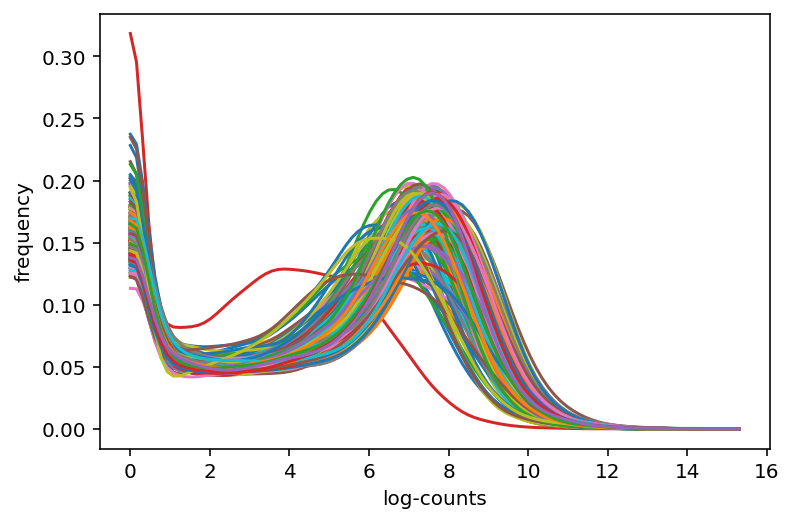

In [58]:
plot_col_density(np.log(expr+1))

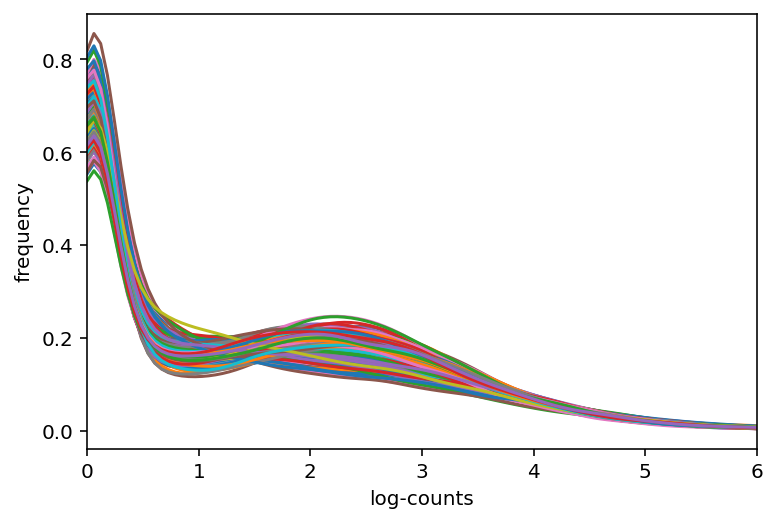

In [59]:
plot_col_density(np.log(rpkm + 1), xlim=(0, 6))

In [62]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [67]:
row = np.random.random(size=5)
repeated_row = repeat(row, 4)
print(row)

[0.23127242 0.97057821 0.01836841 0.41657931 0.49427697]


In [68]:
print_info(repeated_row)

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (0, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [71]:
print_info(np.copy(repeated_row))

number of elements: 20
number of dimensions: 2
shape: (4, 5)
data type: float64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [81]:
def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - size + 1, size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    stride = arr.strides[0]
    n_windows = arr.size - size + 1
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n_windows, size),
                                           strides=(stride, stride))

In [82]:
def mean_filter(signal, window_size=3):
    """Apply a mean filter to the input with the desired window size.
    
    Parameters
    ----------
    signal : 1D array, shape (M,)
        The input signal.
    window_size : int, optional
        The size of the window along which to compute the mean.
        
    Returns
    -------
    filtered : 1D array, shape (M - window_size + 1,)
        The filtered signal.
    """
    signal_sliding = sliding_window(signal, window_size)
    filtered = np.mean(signal_sliding, axis=1)
    return filtered  

In [83]:
signal = np.zeros(100, np.float)
signal[30:60] = 1

diff = np.array([1, 0, -1])
from scipy import ndimage as ndi
dsignal = ndi.convolve(signal, diff)

C:\Users\wasif\AppData\Local\Temp\ipykernel_12816\2192673766.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  signal = np.zeros(100, np.float)


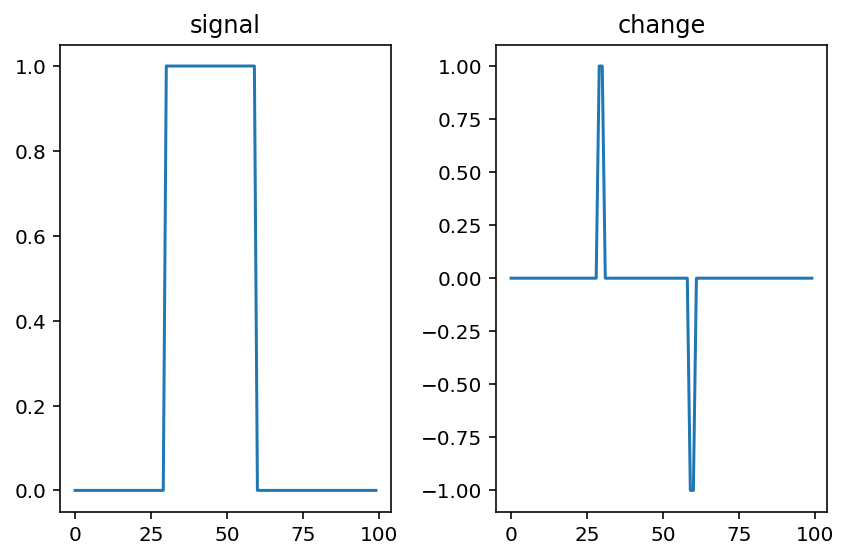

In [84]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(signal)
ax[0].set_title('signal')
ax[1].plot(dsignal)
ax[1].set_title('change')
fig.tight_layout()

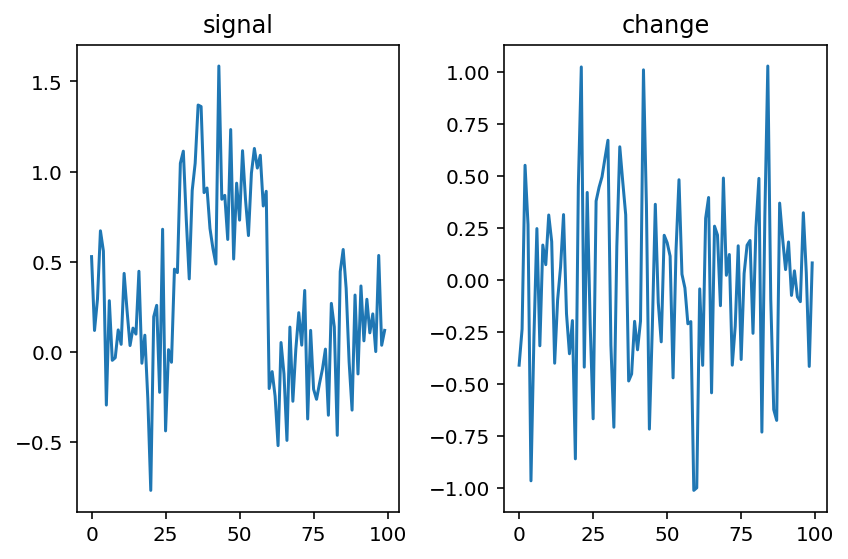

In [85]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
dsignal_noisy = ndi.convolve(signal_noisy, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_noisy)
ax[0].set_title('signal')
ax[1].plot(dsignal_noisy)
ax[1].set_title('change')
fig.tight_layout()

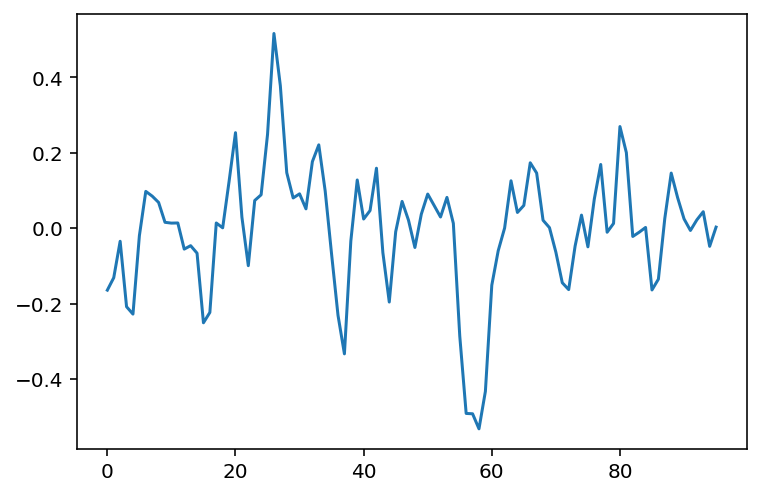

In [86]:
filtered_diff = ndi.convolve(mean_filter(signal_noisy, 5), diff)
fig, ax = plt.subplots()
ax.plot(filtered_diff)

# Fancy indexing
You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [87]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector])  #replace 0 with 0 ,1 with 5 and 2 with 99

[[0 0 1 2]
 [1 1 0 0]
 [1 2 0 2]]
[[ 0  0  5 99]
 [ 5  5  0  0]
 [ 5 99  0 99]]


In [88]:
values[np.array([[1, 2, 2, 2, 0], [1, 1, 1, 1, 1]])]

array([[ 5, 99, 99, 99,  0],
       [ 5,  5,  5,  5,  5]])

In [89]:
values2d = np.array([[0, 5, 99],
                     [8, 70, 80]])

In [90]:
values2d[1, 2]

80

In [91]:
values2d[np.array([1]), np.array([0, 2])]

array([ 8, 80])

In [92]:
relabeled = values[selector]

In [93]:
relabeled

array([[ 0,  0,  5, 99],
       [ 5,  5,  0,  0],
       [ 5, 99,  0, 99]])

In [94]:
has_large_cols = np.any(relabeled > 10, axis=1)
has_large_cols

array([ True, False,  True])

In [95]:
print(relabeled[has_large_cols])

[[ 0  0  5 99]
 [ 5 99  0 99]]


# Linear algebra with NumPy

In [96]:
M = np.array([[0, 1],
              [1, 1],
              [1, 0]])
v = np.array([9, 2])

print(M @ v)

[ 2 11  9]
